## Importando as bibliotecas utilizadas e carregando o arquivo Excel.  

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
dados_vendas = pd.read_excel("desafio_digital_-_2023editado.xlsx")
dados_vendas.head()

,Centro,Unidade,Produto,valor_unitario,Cod_vendedorr,qtd,Data_compra,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,101.0,Avenida,Brinquedos,400,49590.0,17,2021-04-25,NaN,Cod_vendedor,Vendedor,NaN,Tabela de imposto,NaN
1,103.0,Cidade Nova,Berço,690,55354.0,14,2021-03-24,NaN,17988,Luciana,NaN,Alíquota,Faixas de Receita
2,106.0,Avenida,Fogão,1834,19231.0,3,2021-03-31,NaN,14522,Marcela,NaN,0.05,"Até R$ 2.100.000,00"
3,104.0,Avenida,Powerbank,120,19231.0,5,2021-06-16,NaN,15176,Larissa,NaN,0.12,"De R$ 2.100.000,01 A R$ 2.400.000,00"
4,104.0,Amazonas Shopping,Mi Band 6,400,15176.0,20,2022-02-24,NaN,5657,Vanessa,NaN,0.17,"A partir de R$ 2.400.000,01"


### Excluindo a última linha para não levar em consideração na análise de dados.

In [98]:
# A última linha foi excluída do dataframe analisado por causa que mostra
# a soma das colunas de valor_unitario e qtd, que serão utilizadas de uma
# forma diferente no tratamento de dados.

dados_vendas = dados_vendas.drop(dados_vendas.index[-1])

## 1ª Qual o imposto total a ser pago pela empresa? Qual o imposto por unidade?

### Definindo as taxas de imposto

In [53]:
# Até R$ 2.100.000,00
taxa_ate_2m = 0.05

# De R$ 2.100.000,01 a # Até R$ 2.400.000,00
taxa_2m_ate_24m = 0.12

# A partir de R$ 2.100.000,01
taxa_acima_24m = 0.17

### Calculando o valor total dos produtos

In [42]:
dados_vendas['VALOR_TOTAL'] = dados_vendas['valor_unitario'] * dados_vendas['qtd']
dados_vendas['VALOR_TOTAL']


0       6800
1       9660
2       5502
3        600
4       8000
       ...  
894    12000
895     1650
896      423
897     1800
898     4000
Name: VALOR_TOTAL, Length: 899, dtype: int64

### Calculando o imposto

In [87]:
# Calculando o valor total por linha (valor_unitario * quantidade)
dados_vendas['VALOR_TOTAL'] = dados_vendas['valor_unitario'] * dados_vendas['qtd']

# Calculando o imposto por linha com base nas faixas de receita
dados_vendas['IMPOSTO'] = 0  # Inicializar a coluna de imposto
dados_vendas.loc[dados_vendas['VALOR_TOTAL'] <= 2100000, 'IMPOSTO'] = dados_vendas['VALOR_TOTAL'] * taxa_ate_2m
dados_vendas.loc[(dados_vendas['VALOR_TOTAL'] > 2100000.01) & (dados_vendas['VALOR_TOTAL'] <= 2400000), 'IMPOSTO'] = dados_vendas['VALOR_TOTAL'] * taxa_2m_ate_24m
dados_vendas.loc[dados_vendas['VALOR_TOTAL'] > 2400000.01, 'IMPOSTO'] = dados_vendas['VALOR_TOTAL'] * taxa_acima_24m

# Calculando o imposto total da empresa
imposto_total_empresa = dados_vendas['IMPOSTO'].sum()

# Calculando o imposto por unidade
dados_vendas['IMPOSTO_POR_UNIDADE'] = dados_vendas.groupby('Unidade')['IMPOSTO'].transform('sum')

# Exibindo os resultados
print(f"O imposto total a ser pago pela empresa é: R${imposto_total_empresa:.2f}")
print("\nDetalhes do imposto por unidade:")
print(dados_vendas[['Unidade', 'IMPOSTO_POR_UNIDADE']].drop_duplicates())

O imposto total a ser pago pela empresa é: R$677857.90

Detalhes do imposto por unidade:
              Unidade  IMPOSTO_POR_UNIDADE
0             Avenida            107570.80
1         Cidade Nova            112951.25
4   Amazonas Shopping             94784.45
6       Eduardo Gomes            148140.35
7         Nova cidade            114089.20
12             Matriz            100321.85


### Análise Gráfica dos Impostos Totalizados por Unidade

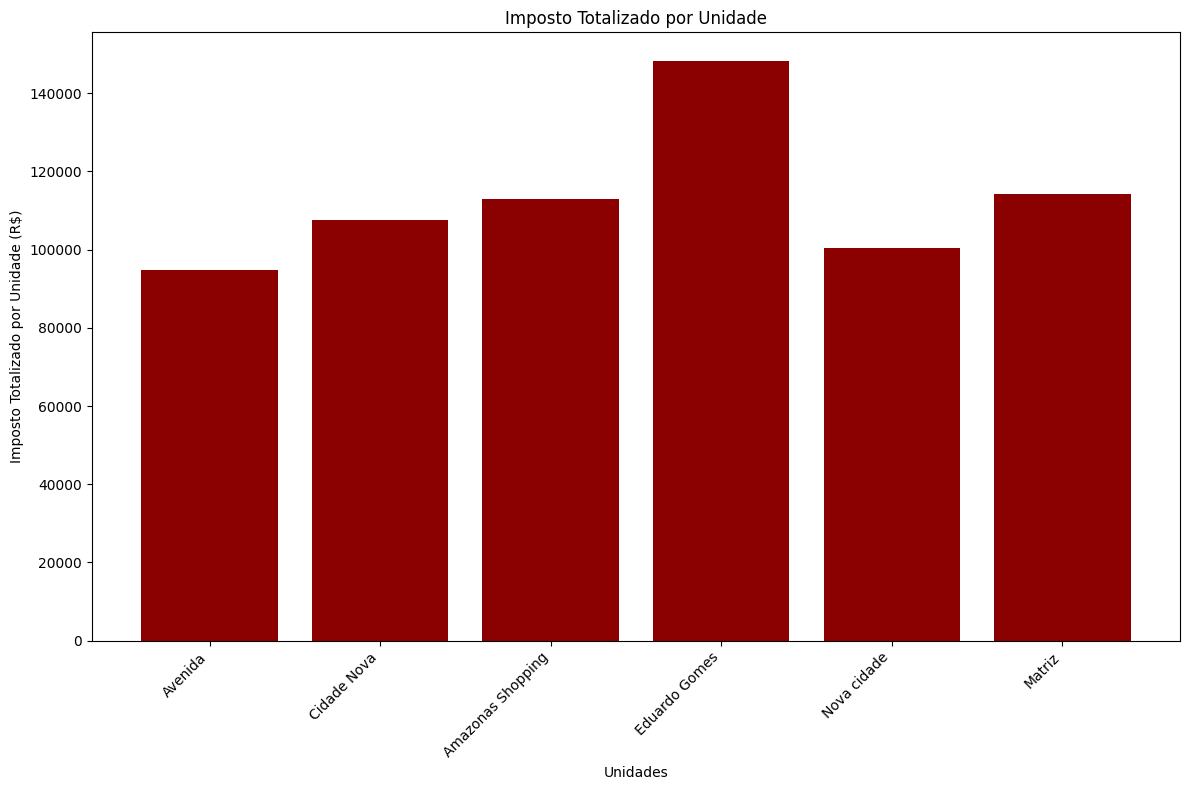

In [93]:
# Gerando o gráfico de barras para o imposto por unidade
plt.figure(figsize=(12, 8))
plt.bar(dados_vendas['Unidade'].unique(), dados_vendas.groupby('Unidade')['IMPOSTO_POR_UNIDADE'].first(), color='darkred')
plt.xlabel('Unidades')
plt.ylabel('Imposto Totalizado por Unidade (R$)')
plt.title('Imposto Totalizado por Unidade')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.tight_layout()

# Exibindo o gráfico
plt.show()

## 2ª Qual é o produto que mais vende? (Analisar por quantidade de produtos e não pelo valor financeiro)

In [63]:
# Calculando a quantidade total vendida por produto
quantidade_por_produto = dados_vendas.groupby('Produto')['qtd'].sum().reset_index()

# Ordenando os produtos por quantidade vendida em ordem decrescente
quantidade_por_produto = quantidade_por_produto.sort_values(by='qtd', ascending=False)

# Exibindo o produto que mais vendeu e o top 10 de produtos
produto_mais_vendido = quantidade_por_produto.iloc[0]['Produto']
top_10_produtos = quantidade_por_produto.head(10)

# Exibindo os resultados
print(f"O produto que mais vendeu foi: {produto_mais_vendido} com {quantidade_por_produto.iloc[0]['qtd']} unidades vendidas.")
print("\nTop 10 de produtos que mais venderam:")
print(top_10_produtos[['Produto', 'qtd']])


O produto que mais vendeu foi: Jogo de Panela com 498 unidades vendidas.

Top 10 de produtos que mais venderam:
            Produto  qtd
12   Jogo de Panela  498
13        Mi Band 6  491
11           Iphone  484
4        Brinquedos  474
1         Bebedouro  454
21          Teclado  449
0   Ar condicionado  436
7             Fogão  433
23    Xbox series s  427
20             Sofá  422


### Análise Gráfica

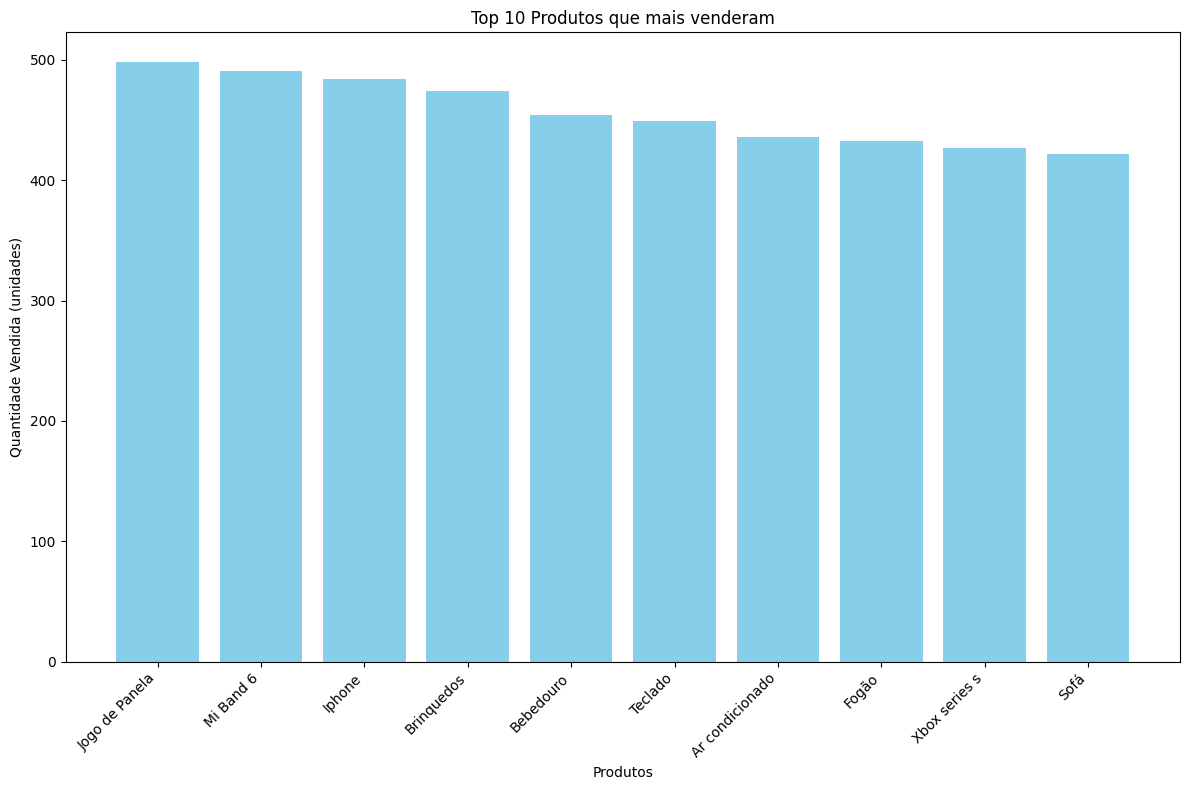

In [81]:
# Gerando o gráfico de barras para o top 10 de produtos
plt.figure(figsize=(12, 8))
plt.bar(top_10_produtos['Produto'], top_10_produtos['qtd'], color='skyblue')
plt.xlabel('Produtos')
plt.ylabel('Quantidade Vendida (unidades)')
plt.title('Top 10 Produtos que mais venderam')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()

## 3ª Quanto cada produto representa sobre o total de vendas da empresa?

In [90]:
# Calculando o total de vendas por produto
total_vendas_por_produto = dados_vendas.groupby('Produto')['VALOR_TOTAL'].sum().reset_index()

# Calculando o total de vendas da empresa
total_vendas_empresa = total_vendas_por_produto['VALOR_TOTAL'].sum()

# Calculando a porcentagem de vendas para cada produto
total_vendas_por_produto['PORCENTAGEM_VENDAS'] = (total_vendas_por_produto['VALOR_TOTAL'] / total_vendas_empresa) * 100

# Exibindo os resultados
print("Porcentagem de vendas por produto:")
print(total_vendas_por_produto[['Produto', 'PORCENTAGEM_VENDAS']])


Porcentagem de vendas por produto:
            Produto  PORCENTAGEM_VENDAS
0   Ar condicionado            5.467223
1         Bebedouro            1.841831
2             Berço            1.705003
3         Bicicleta            3.319280
4        Brinquedos            1.398523
5     Cadeira Gamer            3.434348
6              Cama            3.317805
7             Fogão            5.857585
8    Fone de Ouvido            0.458592
9         Geladeira            9.508542
10     Guarda Roupa            1.853928
11           Iphone           26.775523
12   Jogo de Panela            1.248934
13        Mi Band 6            1.448681
14       Microondas            1.509166
15          Monitor            2.231294
16            Mouse            0.129312
17         Notebook            5.882059
18        Powerbank            0.355827
19          Samsung            4.413904
20             Sofá            4.824758
21          Teclado            0.712059
22        Televisão            6.006569
23   

### Análise Gráfica

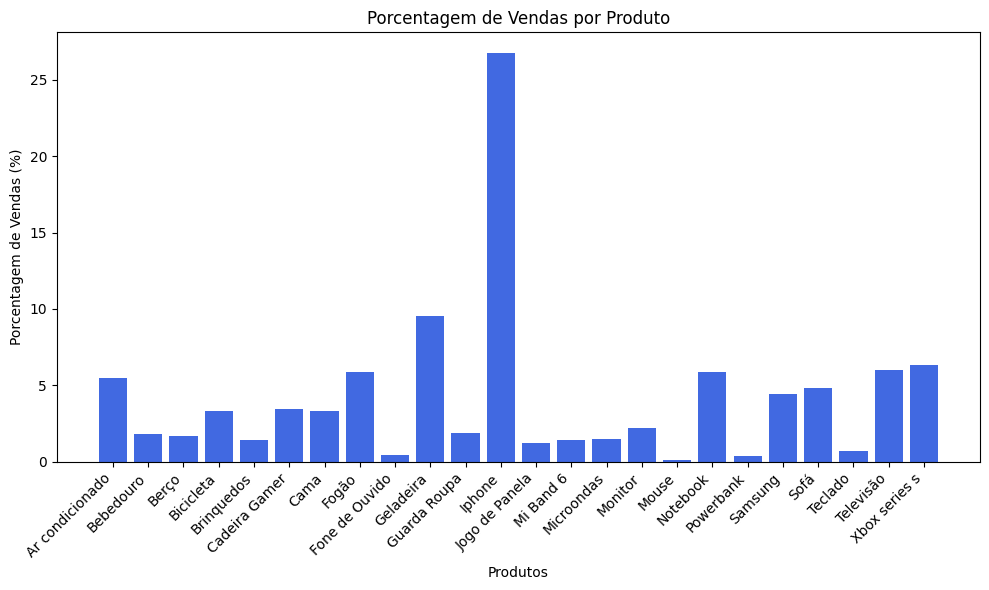

In [95]:
# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_vendas_por_produto['Produto'], total_vendas_por_produto['PORCENTAGEM_VENDAS'], color='royalblue')
plt.xlabel('Produtos')
plt.ylabel('Porcentagem de Vendas (%)')
plt.title('Porcentagem de Vendas por Produto')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()

## 4ª Qual o lucro de cada loja após descontos de impostos?

In [76]:
# Calculando o total de vendas por loja
total_vendas_por_loja = dados_vendas.groupby('Unidade')['VALOR_TOTAL'].sum().reset_index()

# Calculando o total de impostos por loja
total_impostos_por_loja = dados_vendas.groupby('Unidade')['IMPOSTO'].sum().reset_index()

# Calculando o lucro líquido por loja
total_vendas_por_loja['LUCRO_LIQUIDO'] = total_vendas_por_loja['VALOR_TOTAL'] - total_impostos_por_loja['IMPOSTO']

# Exibir os resultados
print("Lucro líquido por Unidade:")
print(total_vendas_por_loja[['Unidade', 'LUCRO_LIQUIDO']])

Lucro líquido por Unidade:
             Unidade  LUCRO_LIQUIDO
0  Amazonas Shopping     1800904.55
1            Avenida     2043845.20
2        Cidade Nova     2146073.75
3      Eduardo Gomes     2814666.65
4             Matriz     1906115.15
5        Nova cidade     2167694.80


### Análise Gráfica

Lucro líquido por loja:
             Unidade  LUCRO_LIQUIDO
0  Amazonas Shopping     1800904.55
1            Avenida     2043845.20
2        Cidade Nova     2146073.75
3      Eduardo Gomes     2814666.65
4             Matriz     1906115.15
5        Nova cidade     2167694.80


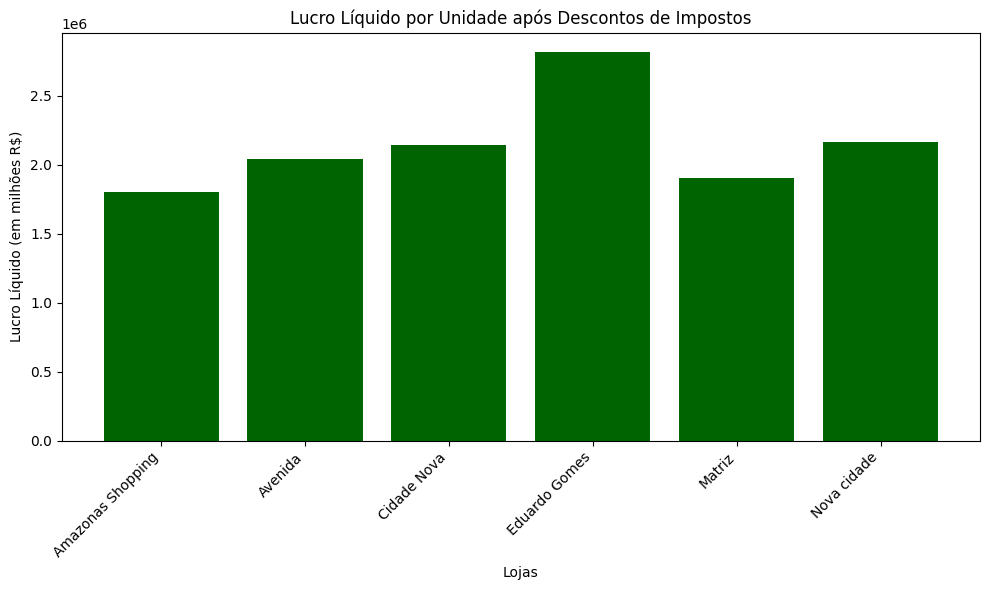

In [97]:
# Exibir os resultados
print("Lucro líquido por loja:")
print(total_vendas_por_loja[['Unidade', 'LUCRO_LIQUIDO']])

# Gerando o gráfico de barras para o lucro líquido por loja
plt.figure(figsize=(10, 6))
plt.bar(total_vendas_por_loja['Unidade'], total_vendas_por_loja['LUCRO_LIQUIDO'], color='darkgreen')
plt.xlabel('Lojas')
plt.ylabel('Lucro Líquido (em milhões R$)')
plt.title('Lucro Líquido por Unidade após Descontos de Impostos')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()

## 5ª Qual o período que cada loja mais vendeu em R$ e qual o valor?

In [79]:
# Convertendo a coluna 'Data_compra' para o formato de data
dados_vendas['Data_compra'] = pd.to_datetime(dados_vendas['Data_compra'])

# Extraindo informações de data para facilitar a análise
dados_vendas['ANO'] = dados_vendas['Data_compra'].dt.year
dados_vendas['MES'] = dados_vendas['Data_compra'].dt.month

# Mapeando os números dos meses para seus respectivos nomes
nome_meses = {
    1: 'JANEIRO', 2: 'FEVEREIRO', 3: 'MARÇO', 4: 'ABRIL',
    5: 'MAIO', 6: 'JUNHO', 7: 'JULHO', 8: 'AGOSTO',
    9: 'SETEMBRO', 10: 'OUTUBRO', 11: 'NOVEMBRO', 12: 'DEZEMBRO'
}

# Substituindo os números dos meses pelos nomes
dados_vendas['MES_NOME'] = dados_vendas['MES'].map(nome_meses)

# Calculando o total de vendas por loja, ano e mês
total_vendas_por_periodo = dados_vendas.groupby(['Unidade', 'ANO', 'MES', 'MES_NOME'])['VALOR_TOTAL'].sum().reset_index()

# Identificando o período de maior venda para cada loja
indice_max_vendas = total_vendas_por_periodo.groupby('Unidade')['VALOR_TOTAL'].idxmax()
periodo_maior_venda_por_loja = total_vendas_por_periodo.loc[indice_max_vendas]

# Exibir os resultados
print("Período de maior venda por loja:")
print(periodo_maior_venda_por_loja[['Unidade', 'ANO', 'MES_NOME', 'VALOR_TOTAL']])

Período de maior venda por loja:
              Unidade   ANO   MES_NOME  VALOR_TOTAL
2   Amazonas Shopping  2021      MARÇO       371271
18            Avenida  2021       MAIO       340133
29        Cidade Nova  2021  FEVEREIRO       348218
52      Eduardo Gomes  2021   NOVEMBRO       444556
58             Matriz  2021      MARÇO       262073
74        Nova cidade  2021       MAIO       287775


### Análise gráfica para o período de maior venda por loja.

Período de maior venda por loja:
              Unidade   ANO   MES_NOME  VALOR_TOTAL
2   Amazonas Shopping  2021      MARÇO       371271
18            Avenida  2021       MAIO       340133
29        Cidade Nova  2021  FEVEREIRO       348218
52      Eduardo Gomes  2021   NOVEMBRO       444556
58             Matriz  2021      MARÇO       262073
74        Nova cidade  2021       MAIO       287775


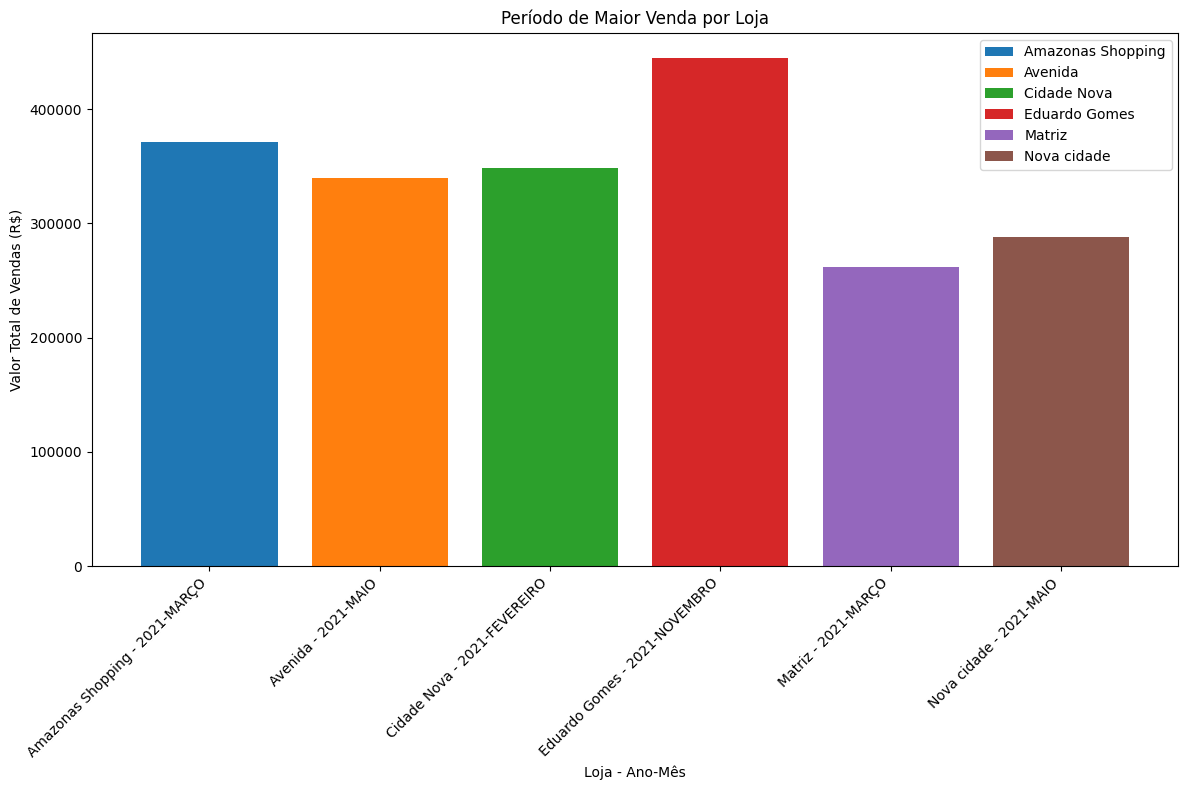

In [96]:
# Exibir os resultados
print("Período de maior venda por loja:")
print(periodo_maior_venda_por_loja[['Unidade', 'ANO', 'MES_NOME', 'VALOR_TOTAL']])

# Gerar o gráfico de barras para o período de maior venda por loja
plt.figure(figsize=(12, 8))

# Iterar sobre cada loja
for loja in periodo_maior_venda_por_loja['Unidade'].unique():
    dados_loja = periodo_maior_venda_por_loja[periodo_maior_venda_por_loja['Unidade'] == loja]
    plt.bar(
        dados_loja['Unidade'].astype(str) + " - " + dados_loja['ANO'].astype(str) + "-" + dados_loja['MES_NOME'],
        dados_loja['VALOR_TOTAL'],
        label=loja
    )

plt.xlabel('Loja - Ano-Mês')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Período de Maior Venda por Loja')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()